# Regularization
With the development of machine learning algorithms and an increase of th sizes of available datasets the problem of overfitting was growing constantly. The number of parameters in the estimated models is often so large, that overfitting is hindering the predictive power of the model. One possible solution to this problem is regularization.

Regularization is a modification of a loss function in such a way, that it incorporates the information about the value of all parameters. Lets say that we are building an estimator $\hat{F}(X)$ by setting the value of parameters vector $\hat{\beta}$ so that a loss function $L(y-\hat{y})$ is minimized. Regularization changes the loss function so that $L' = L(y-\hat{y}) + R(\hat{\beta})$, where $R(\hat{\beta})$ is an additional cost that increases with the increase of the size of parameters $\hat{\beta}$.

## Why use regularization
The main goal of regularization is to decrease overfitting or in other words to increase its generalization. We achieve this through a decrease in the variance of our estimator, that arises from the large number or size of the parameters. How does regularization achieves this?

Lets put ourself in the position of an optimizing agent that build our estimator $\hat{F}(X)$. When making modifications to the estimator, even the smallest ones, does not cost us antyhing, we will keep changing it as long as we can find anything to improve. In supervised laerning this optimizing agent bases its creation of the estimator on the training set. We are making $\hat{F}(X)$ closer to the $F(X)$ by a "coincident", as it is easier to explain the training set by real, general rules, than a description of individual observations. However the smaller the gains from altering our estimator, the greater the chance that we are capturing a charachteristic of the training set (describing individual observatons) and not a general rule.

Lets sat that we should "explain" a person weight based on the observation of people ine the room. We would do a fairly decent job just by saying that taller people are heavier. Then  we would probably say that men are on average heavier than women, and so on. At one point we would run out of "sensible" rules. This would make us create rules that apply to small groups of individuals or even single observations. This would lead to overfitting.

Making adding new rules costly forces our optimizing agent to take the trade off between cost of a new rule and the gains in the reduction of loss function it leads to into consideration. Depending on the way in which this cost is introduced to the loss function it can lead to a decrease of a parameter or even its elimination.

## Regularization L1 i L2
Lets assume that our loss function is given by:
$$L' = L(y-\hat{y}) + R(\hat{\beta})$$
where $L(y-\hat{y})$ is a loss function without regularization and $R(\hat{\beta})$ is a regularization term.

There are three main types of regularization: $L_1$ (Lasso), $L_2$ (Ridge) or a combination of $L_1$ i $L_2$ so called *Elastyc Net*.
* Lasso:
$$R_{L_1} = \alpha \sum_{i=0}^{k} |\beta_i|$$
* Ridge
$$R_{L_2} = \alpha \sum_{i=0}^{k} |\beta_i|^2$$
* Elastic Net 
$$R_{EN} = \alpha \sum_{i=0}^{k} [\gamma|\beta_i| + (1-\gamma)|\beta_i|^2]$$

* With introduction of regularization it may not be possible to find a solution analyticaly. Therefore numerical methods must be used.
* If only $L_1$ regularization is used there can exist multiple optimal solutions.


### Lasso, Ridge i Elastic Net
The different form of regularization term leads to different effects.
* In Lasso ($L_1$) as there are no diminishing returns to the decrease of a parameter some parameters can be reduced to zero. As a result Lasso is also a form of variable selection.
* In Ridge ($L_2$) there are diminishing returns to the decrease of a parameter as a quadratic function is very flat near zero. Therefore parameters are almost never decreased to zero.
* When we use Elastic Net in linear models it tends to "group" corellated variables. Their parameters are kept at similar level.

Lets take a look at the effect of different levels of regularization on the value of parameters. With this synthetic example below we can clearly see how different is Ridge regularization to Lasso regularization.

/home/wilam/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


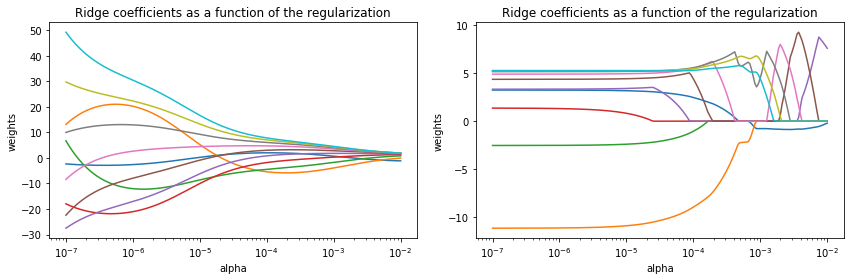

In [1]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr># Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-7, -2, n_alphas)

coefsR = []
coefsL = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefsR.append(ridge.coef_)
    
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X, y)
    coefsL.append(lasso.coef_)

# #############################################################################
# Display results

fig, az = plt.subplots(1, 2, figsize=(12,4))
az = az.flatten()


az[0].plot(alphas, coefsR)
az[0].set_xscale('log')
# az[0].set_xlim(az[0].get_xlim()[::-1])  # reverse axis
az[0].set_xlabel('alpha')
az[0].set_ylabel('weights')
az[0].set_title('Ridge coefficients as a function of the regularization')

az[1].plot(alphas, coefsL)
az[1].set_xscale('log')
# az[1].set_xlim(az[1].get_xlim()[::-1])  # reverse axis
az[1].set_xlabel('alpha')
az[1].set_ylabel('weights')
az[1].set_title('Ridge coefficients as a function of the regularization')

plt.tight_layout()

plt.show()

In the example above we can clearly see that Ridge regression is more stable and changes in parameteres with the size of alpha are more gradual. Especially for larger values of alpha we see that for Ridge all parameters approach zero simultaneously, where for Lasso they drop to zero in certain order. Whats more some parameters can go down to zero with increase of alpha and get positive again with its further increase.

## Regularization with larege number of variables
Lets use Milano weather data to look at this problem. We will use hourly temperature data from december.

/home/wilam/.local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


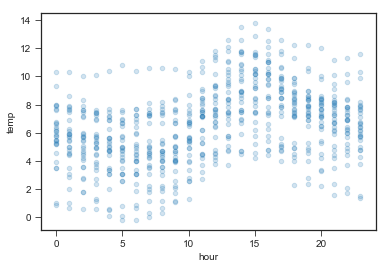

In [2]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline
milanoTemp = pd.read_csv("data/milanoDecTemp.csv")
milanoTemp.plot.scatter("hour", "temp", alpha=0.2)

### Benchmark
Lets see how or linear model will work withour regularization when we start adding additional polynominal elements as features.

In [3]:
from sklearn import linear_model

In [4]:
features = ["hour"]
preds = []
coefs = []
hours = pd.DataFrame(list(range(24)), columns=["hour"])

for power in range (2, 11):
    milanoTemp["hour"+str(power)] = milanoTemp.hour**power 
    hours["hour"+str(power)] = hours.hour**power 
    features.append("hour"+str(power))
    regr = linear_model.LinearRegression()
    regr.fit(milanoTemp[features], milanoTemp["temp"])
    pred = regr.predict(hours[features])
    preds.append(pred)
    coefs.append(dict(zip(hours.columns, regr.coef_)))
coefs = pd.DataFrame(coefs)[hours.columns.tolist()]
coefs

,hour,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10
0,0.348057,-0.009156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.750489,0.112327,-0.003515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.240716,0.212450,-0.010355,0.000148,NaN,NaN,NaN,NaN,NaN,NaN
3,0.283658,-0.288461,0.049242,-0.002788,0.000051,NaN,NaN,NaN,NaN,NaN
4,0.405457,-0.347770,0.060002,-0.003680,0.000085,-4.966826e-07,NaN,NaN,NaN,NaN
5,-1.143525,0.707940,-0.210229,0.029497,-0.002017,6.577101e-05,-8.224628e-07,NaN,NaN,NaN
6,-0.945733,0.527336,-0.148372,0.019058,-0.001056,1.661494e-05,4.900171e-07,-1.425824e-08,NaN,NaN
7,-0.099344,-0.467157,0.288507,-0.077198,0.010907,-8.600112e-04,3.803339e-05,-8.830760e-07,8.389369e-09,NaN
8,-0.480310,0.087445,-0.013347,0.006366,-0.002451,4.462237e-04,-4.131290e-05,2.037611e-06,-5.125208e-08,5.183716e-10


We can notice several important charachteristics. First of all on average the absolute value of the parameters grows when we add more features. It is most visible for 5-8 degrees of polynominal. Additionally, in the image below, we can clearly see that there is a lot of local overfitting for higher degrees of polynominal.

Lets see how this behaviour will change with regularization.

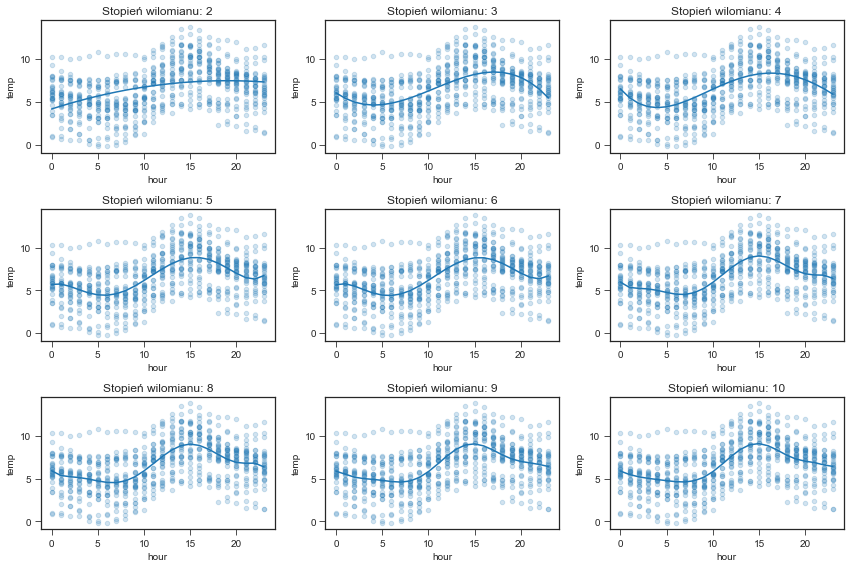

In [5]:
fig, ax = plt.subplots(3, 3, figsize=(12,8))
ax = ax.flatten()
for i, axe in enumerate(ax):
    milanoTemp.plot.scatter("hour", "temp", alpha=0.2, ax=axe)
    axe.plot(preds[i])
    axe.set_title("Stopień wilomianu: {0}".format(i+2))

plt.tight_layout()
plt.show()


## Effect on MSE
Lets see how much better the performance of our model cen get with regularization.

In [6]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
rmse = []
rmseT = []
for train, test in kf.split(milanoTemp.index.values):
    reg = linear_model.LinearRegression()
    reg.fit(milanoTemp.iloc[train][features], milanoTemp.iloc[train]["temp"])
    predsTrain = reg.predict(milanoTemp.iloc[train][features])
    preds = reg.predict(milanoTemp.iloc[test][features])
    rmse.append(mean_squared_error(milanoTemp.iloc[test].temp, preds))
    rmseT.append(mean_squared_error(milanoTemp.iloc[train].temp, predsTrain))
print(np.mean(rmseT), np.mean(rmse))


4.9086212814625165 5.121850469230378


In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for alpha in [0.1, 0.5, 2, 5, 10, 20, 100]:
    rmse = []
    rmseT = []
    for train, test in kf.split(milanoTemp.index.values):
        reg = linear_model.Ridge (alpha = alpha)
        reg.fit(milanoTemp.iloc[train][features], milanoTemp.iloc[train]["temp"])
        predsTrain = reg.predict(milanoTemp.iloc[train][features])
        preds = reg.predict(milanoTemp.iloc[test][features])
        rmse.append(mean_squared_error(milanoTemp.iloc[test].temp, preds))
        rmseT.append(mean_squared_error(milanoTemp.iloc[train].temp, predsTrain))
    print(alpha, np.mean(rmseT), np.mean(rmse))


0.1 4.915064061188074 5.068070221627755
0.5 4.9153158737742055 5.0644931417547285
2 4.915778454884739 5.060451244480043
5 4.916174886941958 5.057208878308996
10 4.916696304608412 5.0542192659152345
20 4.917553368089403 5.051076222273498
100 4.9200637956745386 5.045787686209524


/home/wilam/.local/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.243989560731191e-30 / 1.1102230246251565e-16
  RuntimeWarning)
/home/wilam/.local/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.413276736097091e-30 / 1.1102230246251565e-16
  RuntimeWarning)
/home/wilam/.local/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.294526908343335e-30 / 1.1102230246251565e-16
  RuntimeWarning)
/home/wilam/.local/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. R

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for alpha in [0.01, 0.1, 0.25, 0.5, 1, 2, 5]:
    rmse = []
    rmseT = []
    for train, test in kf.split(milanoTemp.index.values):
        reg = linear_model.Lasso (alpha = alpha)
        reg.fit(milanoTemp.iloc[train][features], milanoTemp.iloc[train]["temp"])
        predsTrain = reg.predict(milanoTemp.iloc[train][features])
        preds = reg.predict(milanoTemp.iloc[test][features])
        rmse.append(mean_squared_error(milanoTemp.iloc[test].temp, preds))
        rmseT.append(mean_squared_error(milanoTemp.iloc[train].temp, predsTrain))
    print(alpha, np.mean(rmseT), np.mean(rmse))


/home/wilam/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.01 5.0627353037419685 5.138999458321615
0.1 5.0714641818259265 5.148496471783711
0.25 5.122846645775299 5.2016286513426975
0.5 5.2522909716266275 5.321949360590728
1 5.251377946770025 5.320783880138909
2 5.259389973318602 5.328203559697441
5 5.268815331702119 5.337470407294723


In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for ratio in [0.1, 0.25, 0.5, 0.75, 0.9]:
    for alpha in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.025]:
        rmse = []
        rmseT = []
        for train, test in kf.split(milanoTemp.index.values):
            reg = linear_model.ElasticNet (alpha = alpha, l1_ratio=ratio)
            reg.fit(milanoTemp.iloc[train][features], milanoTemp.iloc[train]["temp"])
            predsTrain = reg.predict(milanoTemp.iloc[train][features])
            preds = reg.predict(milanoTemp.iloc[test][features])
            rmse.append(mean_squared_error(milanoTemp.iloc[test].temp, preds))
            rmseT.append(mean_squared_error(milanoTemp.iloc[train].temp, predsTrain))
        print(alpha, ratio, np.mean(rmseT), np.mean(rmse))


0.0001 0.1 5.061957566006876 5.145011505334232


/home/wilam/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.0005 0.1 5.061957151900796 5.1450056911349735
0.001 0.1 5.061956888217854 5.144998696992106
0.005 0.1 5.061964804533121 5.144953572870543
0.01 0.1 5.061999210150347 5.144923581510968
0.025 0.1 5.0622566892657925 5.144999807387838
0.0001 0.25 5.06195736345239 5.145011378633179
0.0005 0.25 5.06195615178178 5.145005070023486
0.001 0.25 5.061954919642321 5.144997485787438
0.005 0.25 5.061956193014122 5.144948763132458
0.01 0.25 5.0619852040300835 5.144916931906389
0.025 0.25 5.0622457039976965 5.145007009944328
0.0001 0.5 5.061957025935472 5.145011167541673
0.0005 0.5 5.061954486777 5.1450040367738525
0.001 0.5 5.061951633544905 5.144995487475831
0.005 0.5 5.061942044868951 5.144940767311986
0.01 0.5 5.061962644778818 5.144906838071757
0.025 0.5 5.06223397879824 5.14502550288554
0.0001 0.75 5.061956688510941 5.145010956546339
0.0005 0.75 5.0619528241007385 5.145003005947714
0.001 0.75 5.061948363180643 5.144993492713246
0.005 0.75 5.061928156926006 5.144933136906196
0.01 0.75 5.061940833

In this case we got the best results with Ridge. With Lasso the results got even worse. For Elastic Net there was little to no improvement.

Lets take a look at how different the effect on additional features on Ridge and Lasso is.

In [10]:
features = ["hour"]
preds = []
coefsL = []
hours = pd.DataFrame(list(range(24)), columns=["hour"])

for power in range (2, 11):
    milanoTemp["hour"+str(power)] = milanoTemp.hour**power 
    hours["hour"+str(power)] = hours.hour**power 
    features.append("hour"+str(power))
    regr = linear_model.Lasso (alpha = 10)
    regr.fit(milanoTemp[features], milanoTemp["temp"])
    pred = regr.predict(hours[features])
    preds.append(pred)
    coefsL.append(dict(zip(hours.columns, regr.coef_)))
coefsL = pd.DataFrame(coefsL)[hours.columns.tolist()]



/home/wilam/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [11]:
features = ["hour"]
preds = []
coefsR = []
hours = pd.DataFrame(list(range(24)), columns=["hour"])

for power in range (2, 11):
    milanoTemp["hour"+str(power)] = milanoTemp.hour**power 
    hours["hour"+str(power)] = hours.hour**power 
    features.append("hour"+str(power))
    regr = linear_model.Ridge (alpha = 10)
    regr.fit(milanoTemp[features], milanoTemp["temp"])
    pred = regr.predict(hours[features])
    preds.append(pred)
    coefsR.append(dict(zip(hours.columns, regr.coef_)))
coefsR = pd.DataFrame(coefsR)[hours.columns.tolist()]
print("No regularization:")
display(coefs)
print("Lasso:")
display(coefsL)
print("Ridge")
display(coefsR)




No regularization:


/home/wilam/.local/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.768094406358665e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/home/wilam/.local/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3292866888469185e-20 / 1.1102230246251565e-16
  RuntimeWarning)
/home/wilam/.local/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.739407620921736e-23 / 1.1102230246251565e-16
  RuntimeWarning)
/home/wilam/.local/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. 

,hour,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10
0,0.348057,-0.009156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.750489,0.112327,-0.003515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.240716,0.212450,-0.010355,0.000148,NaN,NaN,NaN,NaN,NaN,NaN
3,0.283658,-0.288461,0.049242,-0.002788,0.000051,NaN,NaN,NaN,NaN,NaN
4,0.405457,-0.347770,0.060002,-0.003680,0.000085,-4.966826e-07,NaN,NaN,NaN,NaN
5,-1.143525,0.707940,-0.210229,0.029497,-0.002017,6.577101e-05,-8.224628e-07,NaN,NaN,NaN
6,-0.945733,0.527336,-0.148372,0.019058,-0.001056,1.661494e-05,4.900171e-07,-1.425824e-08,NaN,NaN
7,-0.099344,-0.467157,0.288507,-0.077198,0.010907,-8.600112e-04,3.803339e-05,-8.830760e-07,8.389369e-09,NaN
8,-0.480310,0.087445,-0.013347,0.006366,-0.002451,4.462237e-04,-4.131290e-05,2.037611e-06,-5.125208e-08,5.183716e-10


Lasso:


,hour,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10
0,0.0,0.004556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.024765,-0.000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.0,0.000000,0.002554,-0.000109,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.0,0.000000,0.002213,-0.000076,-7.914800e-07,NaN,NaN,NaN,NaN,NaN
4,-0.0,0.000000,0.002736,-0.000104,-2.190056e-06,7.253468e-08,NaN,NaN,NaN,NaN
5,-0.0,0.000000,0.003188,-0.000108,-3.419161e-06,-5.446824e-09,4.574529e-09,NaN,NaN,NaN
6,-0.0,-0.000000,0.003238,-0.000089,-3.826815e-06,-5.620020e-08,1.541186e-09,1.884668e-10,NaN,NaN
7,-0.0,-0.000000,0.003037,-0.000063,-3.715132e-06,-7.944350e-08,-2.449647e-10,9.053837e-11,6.695168e-12,NaN
8,-0.0,-0.000000,0.002783,-0.000043,-3.436544e-06,-8.644745e-08,-1.125679e-09,3.560964e-11,3.852775e-12,2.201896e-13


Ridge


,hour,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10
0,0.346550,-0.009095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.732045,0.110511,-0.003466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.136725,0.194247,-0.009229,0.000126,NaN,NaN,NaN,NaN,NaN,NaN
3,0.214480,-0.269253,0.047190,-0.002694,0.000049,NaN,NaN,NaN,NaN,NaN
4,0.224818,-0.274892,0.048272,-0.002787,0.000053,-5.377987e-08,NaN,NaN,NaN,NaN
5,-0.453457,0.327007,-0.124888,0.019972,-0.001456,4.906526e-05,-6.245725e-07,NaN,NaN,NaN
6,-0.289881,0.056718,-0.009774,-0.001937,0.000724,-6.866513e-05,2.648950e-06,-3.669579e-08,NaN,NaN
7,-0.240751,-0.236822,0.179221,-0.052602,0.007845,-6.369047e-04,2.856432e-05,-6.661636e-07,6.316425e-09,NaN
8,-0.204741,-0.115539,0.050523,-0.004192,-0.001471,3.966899e-04,-4.028953e-05,2.053626e-06,-5.241015e-08,5.340537e-10


## Regularization for large number of variables.
### Communities
In this exzample we will use UCI communities dataset. It descrbies multiple charachteristics of local communities together with the crime rate.

Description:
Many variables are included so that algorithms that select or learn weights for attributes could be tested. However, clearly unrelated attributes were not included;  attributes were picked if there was any plausible connection to crime (N=122), plus  the attribute to be predicted (Per Capita Violent Crimes). The variables included in  the dataset involve the community, such as the percent of the population considered  urban, and the median family income, and involving law enforcement, such as per capita  number of police officers, and percent of officers assigned to drug units.

All numeric data was normalized into  the decimal range 0.00-1.00 using an Unsupervised, equal-interval binning method.  Attributes retain their distribution and skew (hence for example the population  attribute has a mean value of 0.06 because most communities are small).

In the complete dataset there are 122 features. We will limit our analysis to 96.

In [12]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

comm = pd.read_csv("data/communities.csv", decimal=",")
# features = comm.columns.tolist()[4:-1]
# features = comm[features].isnull().sum().sort_values().index.tolist()[:-23]
print(comm.shape)
features = ['fold', 'PctHousOccup', 'HousVacant', 'MedNumBR', 'PctHousLess3BR', 'PctPersDenseHous', 'PctPersOwnOccup', 'PersPerRentOccHous', 'PersPerOwnOccHous', 'PersPerOccupHous', 'PctLargHouseOccup', 'PctLargHouseFam', 'PctNotSpeakEnglWell', 'LemasPctOfficDrugUn', 'PctRecImmig10', 'PctRecImmig8', 'PctRecImmig5', 'PctRecentImmig', 'PctImmigRec10', 'PctImmigRec8', 'PctImmigRec5', 'PctImmigRecent', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctUsePubTrans', 'PopDens', 'LandArea', 'PctSameState85', 'PctSameCity85', 'PctSameHouse85', 'PctBornSameState', 'PctForeignBorn', 'NumStreet', 'NumInShelters', 'NumImmig', 'MedOwnCostPctIncNoMtg', 'MedRentPctHousInc', 'MedRent', 'RentHighQ', 'RentMedian', 'RentLowQ', 'OwnOccHiQuart', 'OwnOccMedVal', 'OwnOccLowQuart', 'PctWOFullPlumb', 'PctHousNoPhone', 'MedOwnCostPctInc', 'PctIlleg', 'PctSpeakEnglOnly', 'PctWorkMom', 'whitePerCap', 'perCapInc', 'medFamInc', 'pctWRetire', 'pctWPubAsst', 'pctWSocSec', 'pctWInvInc', 'pctWFarmSelf', 'NumIlleg', 'medIncome', 'blackPerCap', 'pctUrban', 'agePct65up', 'agePct16t24', 'agePct12t29', 'agePct12t21', 'householdsize', 'population', 'numbUrban', 'indianPerCap', 'pctWWage', 'FemalePctDiv', 'PctTeen2Par', 'PctKids2Par', 'PctFam2Par', 'PersPerFam', 'TotalPctDiv', 'PctYoungKids2Par', 'MalePctNevMarr', 'MalePctDivorce', 'PctOccupMgmtProf', 'PctWorkMomYoungKids', 'PctOccupManu', 'PctEmplManu', 'PctEmploy', 'PctUnemployed', 'PctBSorMore', 'PctNotHSGrad', 'PctLess9thGrade', 'PctPopUnderPov', 'NumUnderPov', 'HispPerCap', 'PctEmplProfServ', 'AsianPerCap']
print(len(features))

(1994, 128)
96


We are chaning a continous target variable into a discrete one based on the histogram analysis.

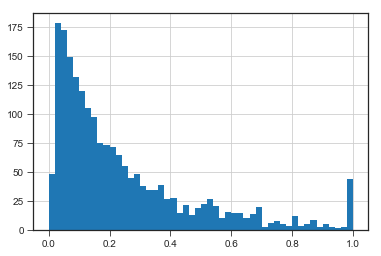

In [13]:
comm.ViolentCrimesPerPop.hist(bins=50)

In [14]:
comm["ViolentCrimesPerPopClass"] = (comm.ViolentCrimesPerPop > 0.46).astype(int)

### Benchmark
Pure logistic regression will be a good benchmark for us.

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))

aucs = []
aucsT = []
for train, test in kf.split(comm.index.values):
    mod = sm.GLM.from_formula(formula="ViolentCrimesPerPopClass ~ "+"+".join(features), data=comm.iloc[train], family=sm.families.Binomial())
    res = mod.fit()
    predsTrain = res.predict()
    preds = res.predict(comm.iloc[test])
    print("Train AUC:", roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain), "Valid AUC:", roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
    aucs.append(roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
    aucsT.append(roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain))
print(np.mean(aucsT), np.mean(aucs))


Train AUC: 0.949087578258395 Valid AUC: 0.8813432835820896
Train AUC: 0.9502636985067096 Valid AUC: 0.8719122089923583
Train AUC: 0.9403833772314896 Valid AUC: 0.9238446411012783
Train AUC: 0.9436992221261884 Valid AUC: 0.9106236786469344
Train AUC: 0.9385599769509877 Valid AUC: 0.9317736185383245
0.9443987706147539 0.9038994861721971


### Ridge, Lasso and Elastic Net
Now we can check how much improvement we can get using regularization.

In [16]:
from sklearn import linear_model

In [17]:
from sklearn.model_selection import KFold
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for alpha in [0.01, 0.1, 0.25, 0.5, 1, 2, 5]:
    aucs = []
    aucsT = []
    for train, test in kf.split(comm.index.values):
        reg = linear_model.Ridge (alpha = alpha)
        reg.fit(comm.iloc[train][features], comm.iloc[train]["ViolentCrimesPerPopClass"])
        predsTrain = reg.predict(comm.iloc[train][features])
        preds = reg.predict(comm.iloc[test][features])
#         print("Train AUC:", roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain), "Valid AUC:", roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
        aucs.append(roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
        aucsT.append(roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain))
    print(alpha, np.mean(aucsT), np.mean(aucs))


0.01 0.9331340429394703 0.9119421314199098
0.1 0.9329173381311608 0.91272075902673
0.25 0.9325691359805621 0.9135963537965965
0.5 0.9321015222457165 0.9136815471244537
1 0.9313793658109795 0.9145840885084289
2 0.93035407506825 0.9151832017343995
5 0.9282925363313291 0.9163951526170173


In [18]:
from sklearn.model_selection import KFold
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for alpha in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.025]:
    aucs = []
    aucsT = []
    for train, test in kf.split(comm.index.values):
        reg = linear_model.Lasso (alpha = alpha)
        reg.fit(comm.iloc[train][features], comm.iloc[train]["ViolentCrimesPerPopClass"])
        predsTrain = reg.predict(comm.iloc[train][features])
        preds = reg.predict(comm.iloc[test][features])
#         print("Train AUC:", roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain), "Valid AUC:", roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
        aucs.append(roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
        aucsT.append(roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain))
    print(alpha, np.mean(aucsT), np.mean(aucs))


0.0001 0.9318460214316003 0.9122104608830066
0.0005 0.9250078387120425 0.9147142439870729
0.001 0.9207276594311793 0.914174201401633
0.005 0.9107049186278431 0.9093488921427383
0.01 0.9021039637640493 0.9009414116302705
0.025 0.8980652489289707 0.8981766012087131


In [19]:
from sklearn.model_selection import KFold
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for ratio in [0.1, 0.25, 0.5, 0.75, 0.9]:
    for alpha in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.025]:
        aucs = []
        aucsT = []
        for train, test in kf.split(comm.index.values):
            reg = linear_model.ElasticNet (alpha = alpha, l1_ratio=ratio)
            reg.fit(comm.iloc[train][features], comm.iloc[train]["ViolentCrimesPerPopClass"])
            predsTrain = reg.predict(comm.iloc[train][features])
            preds = reg.predict(comm.iloc[test][features])
#             print("Train AUC:", roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain), "Valid AUC:", roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
            aucs.append(roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
            aucsT.append(roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain))
        print("Ratio: ", ratio, ", alpha:", alpha, np.mean(aucsT), np.mean(aucs))


/home/wilam/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Ratio:  0.1 , alpha: 0.0001 0.9329499759186826 0.9121769644473252
Ratio:  0.1 , alpha: 0.0005 0.9313274788605627 0.9140021249231935
Ratio:  0.1 , alpha: 0.001 0.9296993859914193 0.9146060385881819
Ratio:  0.1 , alpha: 0.005 0.9235755062611052 0.9153361944039105
Ratio:  0.1 , alpha: 0.01 0.9205213408355141 0.9151837853691841
Ratio:  0.1 , alpha: 0.025 0.917265382313345 0.9136874236579178
Ratio:  0.25 , alpha: 0.0001 0.9327679374942178 0.9124608973674981
Ratio:  0.25 , alpha: 0.0005 0.9302250766166591 0.9145745216270378
Ratio:  0.25 , alpha: 0.001 0.9275743882348182 0.9154526992467978
Ratio:  0.25 , alpha: 0.005 0.9197685562251315 0.9141830835280338
Ratio:  0.25 , alpha: 0.01 0.9170694356009813 0.9124498643889565
Ratio:  0.25 , alpha: 0.025 0.9135433384348183 0.9101822889179282
Ratio:  0.5 , alpha: 0.0001 0.9324079527659949 0.9128176909430563
Ratio:  0.5 , alpha: 0.0005 0.9281269500067756 0.9152796025367687
Ratio:  0.5 , alpha: 0.001 0.9246595634306918 0.9149898203522419
Ratio:  0.5 , al

This time we get similar results for Lasso, ridge and Elastic Net. 
* The highest value 0.914 was wchieved for Elastic Net with ratio 0.1 and alpha equal to 0.005.
* For Ridge we got 0.913 for alpha equal to 1
* Lasso allowed us to achieve around 0.912 for alpha equal to 0.005.

### Comparison to alternative solution to corellation - stakcing.
Now lets see what result we can get if we replace corellated groups ov variables with a single variable created by k-NN on this group. It will be a simple form of stacking so it is nota 1:1 comparison.

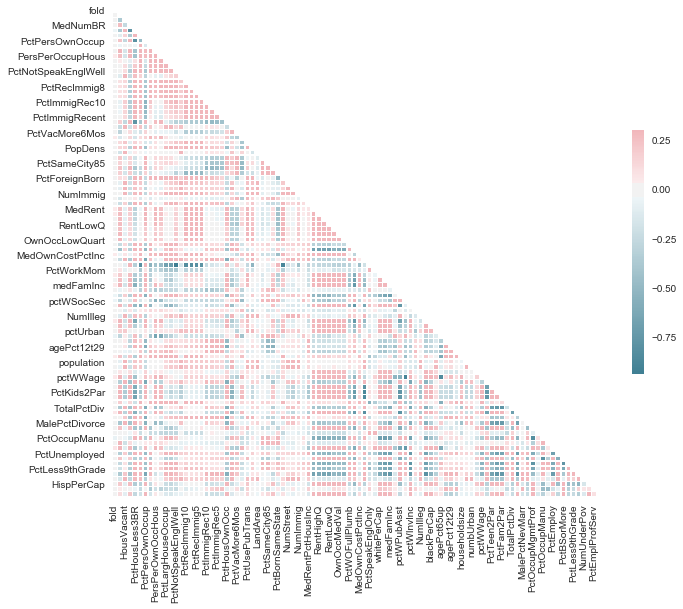

In [20]:
import seaborn as sns
sns.set(style="white")
# Compute the correlation matrix
corr = comm[features].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [21]:
corr = comm[features].corr(method="spearman")
for row in corr.iterrows():
    s = row[1]
    print(row[0])
    print(s[np.abs(s)>0.8])
    print(s[np.abs(s)>0.8].index.tolist())
    print("\n")

fold
fold    1.0
Name: fold, dtype: float64
['fold']


PctHousOccup
PctHousOccup    1.0
Name: PctHousOccup, dtype: float64
['PctHousOccup']


HousVacant
HousVacant    1.0
Name: HousVacant, dtype: float64
['HousVacant']


MedNumBR
MedNumBR          1.000000
PctHousLess3BR   -0.849387
Name: MedNumBR, dtype: float64
['MedNumBR', 'PctHousLess3BR']


PctHousLess3BR
MedNumBR         -0.849387
PctHousLess3BR    1.000000
Name: PctHousLess3BR, dtype: float64
['MedNumBR', 'PctHousLess3BR']


PctPersDenseHous
PctPersDenseHous    1.0
Name: PctPersDenseHous, dtype: float64
['PctPersDenseHous']


PctPersOwnOccup
PctPersOwnOccup    1.000000
PctHousOwnOcc      0.977963
Name: PctPersOwnOccup, dtype: float64
['PctPersOwnOccup', 'PctHousOwnOcc']


PersPerRentOccHous
PersPerRentOccHous    1.0
Name: PersPerRentOccHous, dtype: float64
['PersPerRentOccHous']


PersPerOwnOccHous
PersPerOwnOccHous    1.000000
PersPerOccupHous     0.894069
PersPerFam           0.847186
Name: PersPerOwnOccHous, dtype: float64
['

In [22]:
corrGroups = [
['PersPerOwnOccHous', 'PersPerOccupHous', 'householdsize', 'PersPerFam'],
['PctNotSpeakEnglWell', 'PctRecImmig10', 'PctRecImmig8', 'PctRecImmig5', 'PctRecentImmig', 'PctForeignBorn', 'NumImmig', 'PctSpeakEnglOnly'],
['MedRent', 'RentHighQ', 'RentMedian', 'RentLowQ', 'OwnOccHiQuart', 'OwnOccMedVal', 'OwnOccLowQuart', 'medFamInc', 'medIncome'],
['PctHousNoPhone', 'perCapInc', 'medFamInc', 'pctWInvInc', 'medIncome', 'PctKids2Par', 'PctYoungKids2Par', 'PctPopUnderPov'],
]

In [23]:
from sklearn import neighbors
n_neighbors = 30
clf = neighbors.KNeighborsClassifier(n_neighbors, n_jobs=-1, p=2)
for i, group in enumerate(corrGroups):
    clf.fit(comm[group].values, comm["ViolentCrimesPerPopClass"].values)
    comm["group_"+str(i)] = clf.predict_proba(comm[group].values)[:,0]
for i, group in enumerate(corrGroups):
    features.append("group_"+str(i))
    for var in group:
        try:
            features.remove(var)
        except:
            pass
print(len(features))

73


In [24]:
from sklearn.model_selection import KFold
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for alpha in [0.01, 0.1, 0.25, 0.5, 1, 2, 5]:
    aucs = []
    aucsT = []
    for train, test in kf.split(comm.index.values):
        reg = linear_model.Ridge (alpha = alpha)
        reg.fit(comm.iloc[train][features], comm.iloc[train]["ViolentCrimesPerPopClass"])
        predsTrain = reg.predict(comm.iloc[train][features])
        preds = reg.predict(comm.iloc[test][features])
#         print("Train AUC:", roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain), "Valid AUC:", roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
        aucs.append(roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
        aucsT.append(roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain))
    print(alpha, np.mean(aucsT), np.mean(aucs))


0.01 0.9478285636820016 0.9308668323310126
0.1 0.9476387103449406 0.9307636356144247
0.25 0.9473986151917918 0.9310303594661997
0.5 0.9470551499162954 0.9312542963848033
1 0.9467121550438996 0.931883231118008
2 0.9461206672228025 0.9324783670448887
5 0.9447965676703539 0.9333481324578085


In [25]:
from sklearn.model_selection import KFold
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for alpha in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.025]:
    aucs = []
    aucsT = []
    for train, test in kf.split(comm.index.values):
        reg = linear_model.Lasso (alpha = alpha)
        reg.fit(comm.iloc[train][features], comm.iloc[train]["ViolentCrimesPerPopClass"])
        predsTrain = reg.predict(comm.iloc[train][features])
        preds = reg.predict(comm.iloc[test][features])
#         print("Train AUC:", roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain), "Valid AUC:", roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
        aucs.append(roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
        aucsT.append(roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain))
    print(alpha, np.mean(aucsT), np.mean(aucs))


0.0001 0.9459301252219978 0.9328700399107286
0.0005 0.9428348693420926 0.9352162578251828
0.001 0.9418562649050012 0.9349599184347979
0.005 0.9339661594128892 0.9303785100023084
0.01 0.9273696821956229 0.9260000400611492
0.025 0.9257103737186894 0.923994749017098


In [26]:
from sklearn.model_selection import KFold
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for ratio in [0.1, 0.25, 0.5, 0.75, 0.9]:
    for alpha in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.025]:
        aucs = []
        aucsT = []
        for train, test in kf.split(comm.index.values):
            reg = linear_model.ElasticNet (alpha = alpha, l1_ratio=ratio)
            reg.fit(comm.iloc[train][features], comm.iloc[train]["ViolentCrimesPerPopClass"])
            predsTrain = reg.predict(comm.iloc[train][features])
            preds = reg.predict(comm.iloc[test][features])
#             print("Train AUC:", roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain), "Valid AUC:", roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
            aucs.append(roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
            aucsT.append(roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain))
        print(alpha, np.mean(aucsT), np.mean(aucs))


0.0001 0.9472191806973701 0.9339046813555429
0.0005 0.9461315776693855 0.9345384931620341
0.001 0.9452620944570393 0.9352030800662658
0.005 0.9416659032652959 0.9372150408076912
0.01 0.9388031536307635 0.9362252715669269
0.025 0.934608531464967 0.9332983515755847
0.0001 0.9470733184968255 0.9339271179755423
0.0005 0.9454653364141539 0.9349999727665143
0.001 0.9440728130723427 0.9359073647298694
0.005 0.9399002605706075 0.9372568555709044
0.01 0.9368633925737578 0.9356223956140131
0.025 0.932842086027368 0.9323054975721871
0.0001 0.9467715951626676 0.9339849456897629
0.0005 0.9443055253445317 0.9358921296743109
0.001 0.9428702169735736 0.9367953746560371
0.005 0.9374978671627513 0.9357747622142163
0.01 0.9346779254330642 0.9341504995622485
0.025 0.9262363436428434 0.9260613699370225
0.0001 0.9464523732716777 0.9341700879662518
0.0005 0.9434506897686988 0.9360949133377947
0.001 0.9421591744188527 0.9375923317960572
0.005 0.9358280833167758 0.9352375289082872
0.01 0.9310727104437536 0.930

After our feature generation we achieve much better results. Which are around 9.3. Different levels of regularization can help improve it but only a little bit.